In [74]:
import geopandas as gpd
import matplotlib.pyplot as plt
from osdatahub import Extent, FeaturesAPI, NGD
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['PROJ_NETWORK'] = 'OFF'

In [75]:
# Choose data product
collection = "bld-fts-buildingpart"

# Define query extent
W, S = (384902, 254425)
E, N = (385188, 254602)

crs = "EPSG:27700"
extent = Extent.from_bbox((W, S, E, N), crs=crs)

# Query API
key = os.getenv('key')
ngd_building_part = NGD(key, collection)
bld_fts_results = ngd_building_part.query(extent=extent, crs=crs)

In [76]:
bld_fts_gdf = gpd.GeoDataFrame.from_features(bld_fts_results['features'], crs=crs)

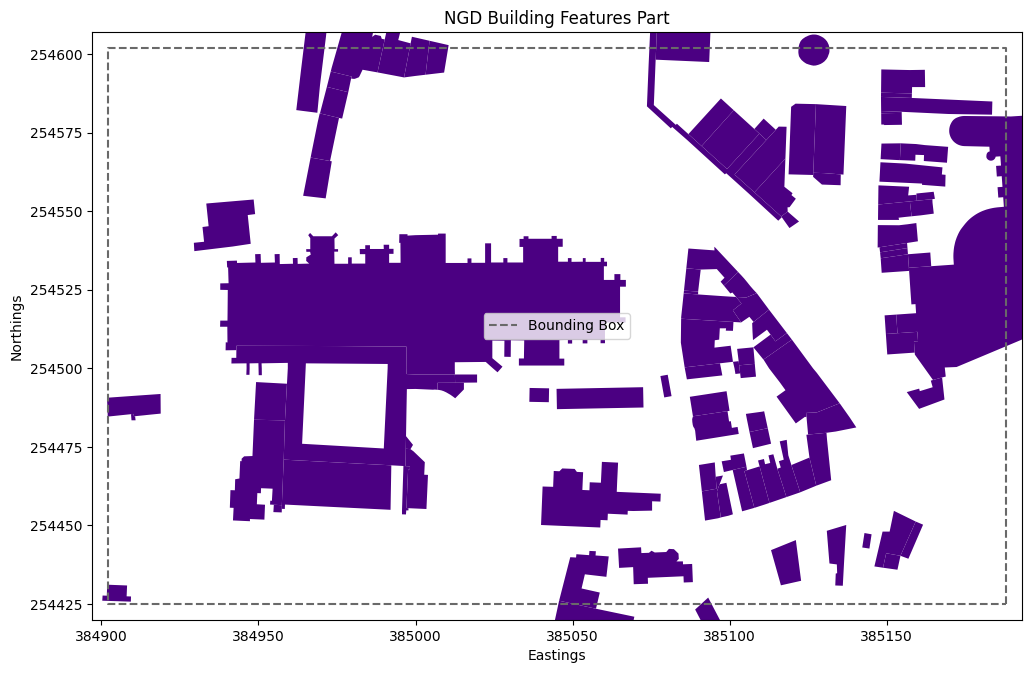

In [77]:
ax = bld_fts_gdf.plot(color="indigo", figsize=(12, 10))

# Plot the query extent
ax.plot(*zip(*extent.polygon.exterior.coords), color="dimgray",
        linestyle='--', label="Bounding Box", label)

# Define limits of the plot
bounds = extent.polygon.bounds
# margin adds a bit of space around the bounding box
margin = 5
x_limits = (bounds[0] - margin, bounds[2] + margin)
y_limits = (bounds[1] - margin, bounds[3] + margin)
ax.set_xlim(*x_limits)
ax.set_ylim(*y_limits)

# Add labels
ax.set_xlabel("Eastings")
ax.set_ylabel("Northings")
ax.set_title("NGD Building Features Part")
plt.legend()
plt.show()